In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns 


In [ ]:
pip install pandas 

                             Criando bases de dados

In [24]:
data = pd.DataFrame({
    "Vibração":[3.2, 4.0, 3.7, 5.5, 6.2, 2.1, 2.8, 1.9, 7.3, 6.8, 2.4, 5.9, 4.5, 
                2.6, 4.8, 3.4, 6.1, 2.0, 5.0, 7.0],
    "Corrente":[12.5, 14.2, 11.8, 15.6, 17.0, 10.2, 9.5, 8.8, 18.4, 17.8, 10.8, 16.2, 
                13.4, 9.9, 13.9, 11.5, 16.7, 8.6, 14.8, 18.0],
    "Temperatura":[50.0, 51.2, 48.5, 53.1, 56.8, 45.7, 43.2, 41.6, 59.3, 57.9, 46.9, 54.7, 49.7, 44.5, 
                   50.8, 47.3, 55.4, 41.0, 52.3, 58.7],
    "Classe":['Não Defeituosa', 'Não Defeituosa', 'Não Defeituosa', 'Não Defeituosa', 'Não Defeituosa',
               'Defeituosa', 'Defeituosa', 'Defeituosa', 'Não Defeituosa', 'Não Defeituosa',
               'Defeituosa', 'Não Defeituosa', 'Não Defeituosa', 'Defeituosa', 'Não Defeituosa', 'Não Defeituosa',
               'Não Defeituosa', 'Defeituosa', 'Não Defeituosa', 'Não Defeituosa']})

                             Selecionando os dados do dataframe

In [25]:
#eparando as caracteristicas e o rótulo 
X = data[['Vibração', 'Corrente', 'Temperatura']]
y = data['Classe']

In [26]:
#Dividindo  o conjunto de dados em treinamento (70%) e teste(30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

                           Treinamento o modelo SVM

In [27]:
model = SVC(kernel= 'linear') # crio o modelo SVC
model.fit(X_train, y_train) #treino o modelo


SVC(kernel='linear')

In [31]:
y_pred=model.predict(X_test)

In [ ]:
X_test

In [ ]:
data.head(18)

                        Avaliando as métricas do algoritimo de Machine Learning

In [39]:
acuracy=accuracy_score(y_pred, y_test)
print(acuracy)

1.0


In [40]:
classi_re=classification_report(y_pred, y_test)
print(classi_re)
#Classification_report mostra um resumo das 

                precision    recall  f1-score   support

    Defeituosa       1.00      1.00      1.00         2
Não Defeituosa       1.00      1.00      1.00         4

      accuracy                           1.00         6
     macro avg       1.00      1.00      1.00         6
  weighted avg       1.00      1.00      1.00         6



In [41]:
cm= confusion_matrix(y_pred, y_test)

Text(0.5, 1.0, 'Matriz de confusão para algoritimo SVM')

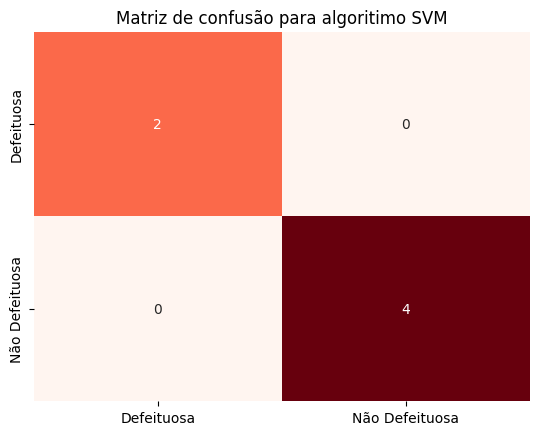

In [42]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Defeituosa', 'Não Defeituosa'],
            yticklabels=['Defeituosa', 'Não Defeituosa'])

plt.title('Matriz de confusão para algoritimo SVM')

                                    Vizualização dos dados da máquina de fomra grafica

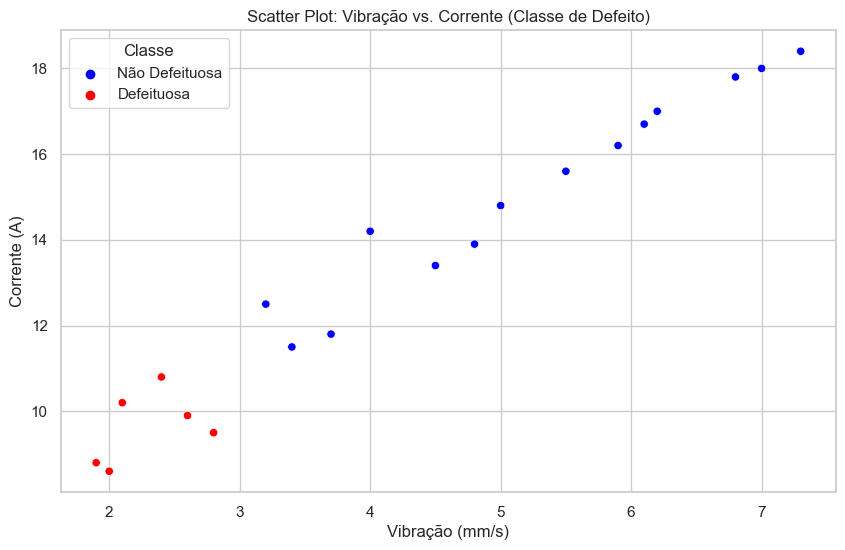

In [43]:
sns.set(style="whitegrid")
# Mapeando as cores com base na classe
palette = {"Defeituosa": "red", "Não Defeituosa": "blue"}
# Criando o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Vibração', y='Corrente', hue='Classe', data=data, palette= palette)

# Personalizando o gráfico
plt.title('Scatter Plot: Vibração vs. Corrente (Classe de Defeito)')
plt.xlabel('Vibração (mm/s)')
plt.ylabel('Corrente (A)')

# Mostrando o gráfico
plt.legend(title='Classe')
plt.show()